In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data/Cleaned_ships_data.csv
data/container.xlsx
data/Port_locations.csv
data/Ship_Uncleaned.csv
data/supply.xlsx


**Import Libraries**

On the first step we import important libraries.


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pylab
from math import radians, sin, cos, asin, sqrt
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
# !pip install openpyxl

**Loading Dataset:**

By using pandas we import our raw data into a jupyter notebook and display all rows in our data.


In [69]:
data = pd.read_excel('data/container.xlsx')
data.head()

,CONTAINER_NUMBER,VESSEL_NAME,FREIGHT_FORWARDER,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,LAST_TRACKED_WITH_VESSEL,DELIVERED_FLAG,DELIVERED_DATE,Another NEW Predicated Delivery Date
0,FCIU8573349,CAPE SOUNIO,CIF,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-17,2021-07-15,2021-08-03,2021-08-03,Yes,2021-07-21,?
1,TGBU9903815,CAPE SOUNIO,CIF,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-23,2021-07-21,2021-08-09,2021-07-26,Yes,2021-07-27,?
2,TCNU3242533,OOCL LUXEMBOURG,Axiom,"Shanghai, Shanghai Shi, China","Shanghai, Shanghai Shi, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-04-11,2021-04-17 00:00:00,2021-05-05,2021-06-07,2021-06-11,2021-06-20,Yes,2021-06-16,?
3,FCIU8623774,MSC ORION,LF,"Vung Tau, Tinh Ba Ria-Vung Tau, Vietnam","Ho Chi Minh City, Ho Chi Minh City, Vietnam","Long Beach, California, United States","Dallas, Texas, United States",2021-05-19,2021-05-20 00:00:00,2021-07-15,2021-07-12,2021-07-19,2021-08-24,Yes,2021-07-20,?
4,FCIU9776905,COSCO ENGLAND,CIF,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-05-18,2021-05-24 00:00:00,2021-06-11,2021-06-22,2021-06-26,2021-06-26,Yes,2021-06-28,?


<Axes: >

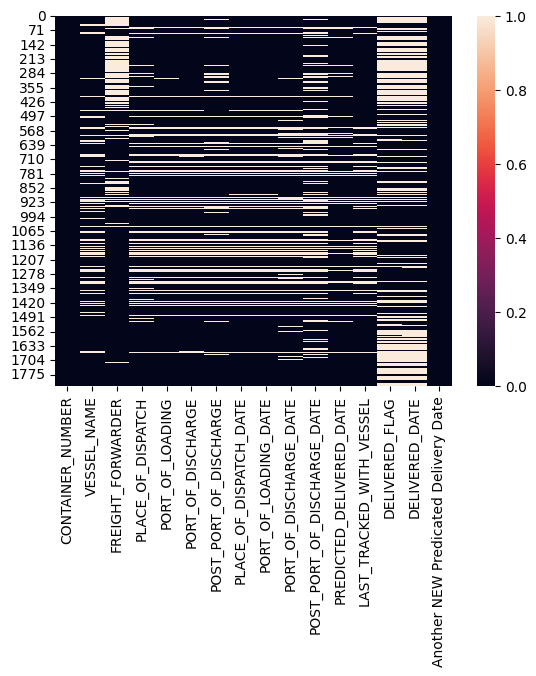

In [70]:
sns.heatmap(data.isnull())

We see the map and sum of missing values show there is a lot of missing information in our data. To handle this problem we drop the null values rows and some useless columns for our model like container_number and vessel name etc.


In [71]:
data.isnull().sum()

CONTAINER_NUMBER                          0
VESSEL_NAME                             296
FREIGHT_FORWARDER                       429
PLACE_OF_DISPATCH                       309
PORT_OF_LOADING                         253
PORT_OF_DISCHARGE                       266
POST_PORT_OF_DISCHARGE                  323
PLACE_OF_DISPATCH_DATE                  249
PORT_OF_LOADING_DATE                    249
PORT_OF_DISCHARGE_DATE                  336
POST_PORT_OF_DISCHARGE_DATE             508
PREDICTED_DELIVERED_DATE                152
LAST_TRACKED_WITH_VESSEL                224
DELIVERED_FLAG                          764
DELIVERED_DATE                          781
Another NEW Predicated Delivery Date      0
dtype: int64

In [72]:
data.tail()

,CONTAINER_NUMBER,VESSEL_NAME,FREIGHT_FORWARDER,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,LAST_TRACKED_WITH_VESSEL,DELIVERED_FLAG,DELIVERED_DATE,Another NEW Predicated Delivery Date
1825,FSCU6353914,PEARL RIVER BRIDGE,JAS,"Chattogram, Chittagong, Bangladesh","Chattogram, Chittagong, Bangladesh","Los Angeles, California, United States","Dallas, Texas, United States",2021-11-11,2021-11-15 00:00:00,2022-02-16,2022-02-27,2022-03-03,2022-02-16,NaN,NaT,?
1826,MAGU5225236,CSCL YELLOW SEA,Art Time,"Tianjin Xingang, Tianjin Shi, China","Tianjin Xingang, Tianjin Shi, China","Long Beach, California, United States","Dallas, Texas, United States",2022-01-09,2022-01-13 00:00:00,2022-03-12,2022-03-06,2022-03-29,2022-02-18,NaN,NaT,?
1827,BEAU4698279,AS SARA,LF,"Ho Chi Minh City, Ho Chi Minh City, Vietnam","Cai Mep, Tinh Ba Ria-Vung Tau, Vietnam","Long Beach, California, United States","Dallas, Texas, United States",2022-01-30,2022-02-01 00:00:00,2022-03-01,2022-03-08,2022-03-12,2022-02-18,NaN,NaT,?
1828,CAIU9631734,CSCL SUMMER,YUEHSNEG,"Tianjin Xingang, Tianjin Shi, China","Tianjin Xingang, Tianjin Shi, China","Dallas, Texas, United States","Dallas, Texas, United States",2021-12-21,2021-12-29 00:00:00,2022-03-29,2022-02-18,2022-02-18,2022-02-15,NaN,NaT,?
1829,TGHU9306386,OOCL TAIPEI,Axiom,"Shanghai, Shanghai Shi, China","Shanghai, Shanghai Shi, China","Long Beach, California, United States","Dallas, Texas, United States",2022-01-31,2022-02-20 00:00:00,2022-03-03,2022-03-12,2022-03-16,2022-02-17,NaN,NaT,?


In [73]:
clean_data=data.dropna()

In [74]:
clean_data.drop(columns=['CONTAINER_NUMBER','VESSEL_NAME','FREIGHT_FORWARDER','Another NEW Predicated Delivery Date','LAST_TRACKED_WITH_VESSEL','DELIVERED_FLAG','Another NEW Predicated Delivery Date'],inplace = True)

C:\Users\gagan\AppData\Local\Temp\ipykernel_23448\1273388736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.drop(columns=['CONTAINER_NUMBER','VESSEL_NAME','FREIGHT_FORWARDER','Another NEW Predicated Delivery Date','LAST_TRACKED_WITH_VESSEL','DELIVERED_FLAG','Another NEW Predicated Delivery Date'],inplace = True)


In [75]:
days_for_delivery= (pd.to_datetime(clean_data['DELIVERED_DATE'])-pd.to_datetime(clean_data['PLACE_OF_DISPATCH_DATE']))

In [76]:
clean=pd.DataFrame(days_for_delivery)
clean.columns = ['delivered_in_days']
clean.shape

(617, 1)

In [77]:
df = pd.concat([clean_data, clean] , axis = 1)
df.head()

,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,DELIVERED_DATE,delivered_in_days
0,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-17,2021-07-15,2021-08-03,2021-07-21,64 days
1,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-23,2021-07-21,2021-08-09,2021-07-27,70 days
2,"Shanghai, Shanghai Shi, China","Shanghai, Shanghai Shi, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-04-11,2021-04-17 00:00:00,2021-05-05,2021-06-07,2021-06-11,2021-06-16,66 days
3,"Vung Tau, Tinh Ba Ria-Vung Tau, Vietnam","Ho Chi Minh City, Ho Chi Minh City, Vietnam","Long Beach, California, United States","Dallas, Texas, United States",2021-05-19,2021-05-20 00:00:00,2021-07-15,2021-07-12,2021-07-19,2021-07-20,62 days
4,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-05-18,2021-05-24 00:00:00,2021-06-11,2021-06-22,2021-06-26,2021-06-28,41 days


In [78]:
import re

df['delivered_in_days'] = df['delivered_in_days'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]))

In [79]:
df.head()

,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,DELIVERED_DATE,delivered_in_days
0,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-17,2021-07-15,2021-08-03,2021-07-21,64
1,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-23,2021-07-21,2021-08-09,2021-07-27,70
2,"Shanghai, Shanghai Shi, China","Shanghai, Shanghai Shi, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-04-11,2021-04-17 00:00:00,2021-05-05,2021-06-07,2021-06-11,2021-06-16,66
3,"Vung Tau, Tinh Ba Ria-Vung Tau, Vietnam","Ho Chi Minh City, Ho Chi Minh City, Vietnam","Long Beach, California, United States","Dallas, Texas, United States",2021-05-19,2021-05-20 00:00:00,2021-07-15,2021-07-12,2021-07-19,2021-07-20,62
4,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-05-18,2021-05-24 00:00:00,2021-06-11,2021-06-22,2021-06-26,2021-06-28,41


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 0 to 1815
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   PLACE_OF_DISPATCH            617 non-null    object        
 1   PORT_OF_LOADING              617 non-null    object        
 2   PORT_OF_DISCHARGE            617 non-null    object        
 3   POST_PORT_OF_DISCHARGE       617 non-null    object        
 4   PLACE_OF_DISPATCH_DATE       617 non-null    datetime64[ns]
 5   PORT_OF_LOADING_DATE         617 non-null    object        
 6   PORT_OF_DISCHARGE_DATE       617 non-null    datetime64[ns]
 7   POST_PORT_OF_DISCHARGE_DATE  617 non-null    datetime64[ns]
 8   PREDICTED_DELIVERED_DATE     617 non-null    datetime64[ns]
 9   DELIVERED_DATE               617 non-null    datetime64[ns]
 10  delivered_in_days            617 non-null    int64         
dtypes: datetime64[ns](5), int64(1), object(5)
memory 

In [81]:
# df['delivered_in_days']=df['delivered_in_days'].astype('timedelta64[s]')

In [82]:
df

,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,DELIVERED_DATE,delivered_in_days
0,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-17,2021-07-15,2021-08-03,2021-07-21,64
1,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-05-18,2021-05-19 00:00:00,2021-07-23,2021-07-21,2021-08-09,2021-07-27,70
2,"Shanghai, Shanghai Shi, China","Shanghai, Shanghai Shi, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-04-11,2021-04-17 00:00:00,2021-05-05,2021-06-07,2021-06-11,2021-06-16,66
3,"Vung Tau, Tinh Ba Ria-Vung Tau, Vietnam","Ho Chi Minh City, Ho Chi Minh City, Vietnam","Long Beach, California, United States","Dallas, Texas, United States",2021-05-19,2021-05-20 00:00:00,2021-07-15,2021-07-12,2021-07-19,2021-07-20,62
4,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Long Beach, California, United States","Gainesville, Texas, United States",2021-05-18,2021-05-24 00:00:00,2021-06-11,2021-06-22,2021-06-26,2021-06-28,41
...,...,...,...,...,...,...,...,...,...,...,...
1787,"Ho Chi Minh City, Ho Chi Minh City, Vietnam","Vung Tau, Tinh Ba Ria-Vung Tau, Vietnam","Los Angeles, California, United States","Dallas, Texas, United States",2021-12-08,2021-12-12 00:00:00,2022-01-31,2022-02-05,2022-02-08,2022-02-10,64
1805,"Yantian, Guangdong Sheng, China","Yantian, Guangdong Sheng, China","Los Angeles, California, United States","Dallas, Texas, United States",2021-12-24,2021-12-28 00:00:00,2022-02-03,2022-02-11,2022-02-11,2022-02-17,55
1810,"Ho Chi Minh City, Ho Chi Minh City, Vietnam","Vung Tau, Tinh Ba Ria-Vung Tau, Vietnam","Long Beach, California, United States","Dallas, Texas, United States",2021-11-22,2021-11-30 00:00:00,2022-02-02,2022-02-12,2022-02-16,2022-02-17,87
1813,"Ningbo, Zhejiang Sheng, China","Ningbo, Zhejiang Sheng, China","Long Beach, California, United States","Dallas, Texas, United States",2021-12-22,2021-12-25 00:00:00,2022-02-06,2022-02-14,2022-02-15,2022-02-17,57


c:\Users\gagan\anaconda3\envs\bookrec-app\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 62.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\gagan\anaconda3\envs\bookrec-app\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 59.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


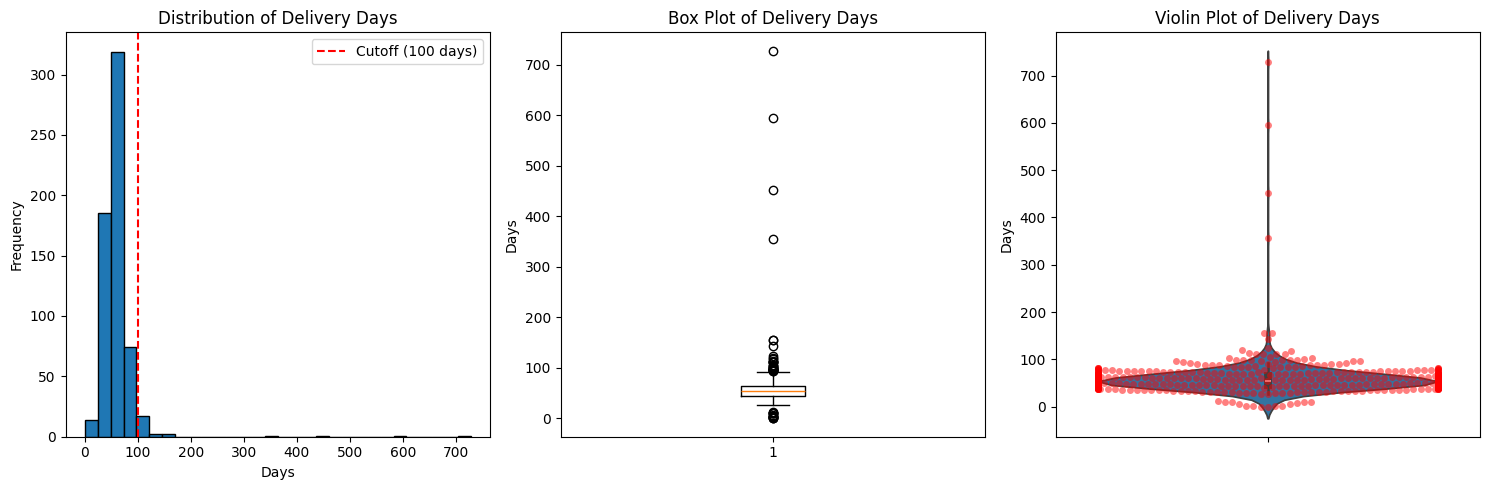


Summary Statistics for Delivery Days:
count    617.000000
mean      59.573744
std       44.238743
min        0.000000
25%       45.000000
50%       54.000000
75%       64.000000
max      728.000000
Name: delivered_in_days, dtype: float64

Number of deliveries taking more than 100 days: 19
Maximum delivery days: 728


In [83]:
# Create a figure with multiple subplots
plt.figure(figsize=(15, 5))

# Plot 1: Histogram of delivery days
plt.subplot(131)
plt.hist(df['delivered_in_days'], bins=30, edgecolor='black')
plt.axvline(x=100, color='r', linestyle='--', label='Cutoff (100 days)')
plt.title('Distribution of Delivery Days')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.legend()

# Plot 2: Box plot to show outliers
plt.subplot(132)
plt.boxplot(df['delivered_in_days'])
plt.title('Box Plot of Delivery Days')
plt.ylabel('Days')

# Plot 3: Violin plot with swarm plot overlay
plt.subplot(133)
sns.violinplot(y=df['delivered_in_days'])
sns.swarmplot(y=df['delivered_in_days'], color="red", alpha=0.5)
plt.title('Violin Plot of Delivery Days')
plt.ylabel('Days')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Delivery Days:")
print(df['delivered_in_days'].describe())
print(f"\nNumber of deliveries taking more than 100 days: {sum(df['delivered_in_days'] > 100)}")
print(f"Maximum delivery days: {df['delivered_in_days'].max()}")

Average delivered days was around 60 there are many outliers like some container are take more than 100 days (728 was maximum days spent to delivered the order) which are considered outliers and exceptional cases may be they face  some technical, manufacturer covid19  because all the data points are from 2021, So we bound our data within 100 days for best results and drop rows which spent more than 100 days. 

In [84]:
df = df[df['delivered_in_days']>0]
df = df[df['delivered_in_days']<100]

We extract the day and day of week from PLACE_OF_DISPATCH_DATE and PORT_OF_LOADING_DATE, purpose is simple to consider each and every useful feature form data because we will use decision tree model ( random forest machine learning model (how its work we will discuss later)).


In [85]:
df['Dispatch_month']=df.PLACE_OF_DISPATCH_DATE.dt.month
df['Dispatch_weak']=df.PLACE_OF_DISPATCH_DATE.dt.day_of_week


In [86]:
df['PORT_OF_LOADING_DATE'] = pd.to_datetime(df['PORT_OF_LOADING_DATE'], errors='coerce')
df['Loading_month']=df.PORT_OF_LOADING_DATE.dt.month
df['Loading_weak']=df.PORT_OF_LOADING_DATE.dt.day_of_week

In our dataset there is some missing  information like distance from dispatch to delivery places and the route etc so we are dependent on given information and make them useful for this goal we label our categorical variable by sklearn library which just replaces each unique string by a numeric value. Because categorical variables cannot work directly in random forest models, we need to encode them.


In [87]:
df.to_csv("cleased_data.csv")

In [88]:
from sklearn.preprocessing import LabelEncoder

def create_label_mappings(df, columns):
    """
    Create label encoding mappings for specified columns
    Returns a dictionary of dictionaries with {column_name: {original_value: encoded_value}}
    """
    mappings = {}
    label_encoders = {}
    
    for column in columns:
        # Create and fit label encoder
        le = LabelEncoder()
        le.fit(df[column])
        
        # Create mapping dictionary
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        
        # Store both the mapping and encoder
        mappings[column] = mapping
        label_encoders[column] = le
        
        # Transform the data
        df[column] = le.transform(df[column])
    
    return mappings, label_encoders

# List of columns to encode
categorical_columns = [
    'PLACE_OF_DISPATCH',
    'PORT_OF_LOADING',
    'PORT_OF_DISCHARGE',
    'POST_PORT_OF_DISCHARGE'
]

# Create mappings and transform data
mappings, label_encoders = create_label_mappings(df, categorical_columns)

# Save the encoders and mappings
import pickle
import os

os.makedirs('models', exist_ok=True)

# Save label encoders
with open('models/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# Save mappings
with open('models/label_mappings.pkl', 'wb') as f:
    pickle.dump(mappings, f)

# Print mappings for verification
for column, mapping in mappings.items():
    print(f"\n{column} mappings:")
    for original, encoded in mapping.items():
        print(f"{original}: {encoded}")


PLACE_OF_DISPATCH mappings:
Cai Mep, Tinh Ba Ria-Vung Tau, Vietnam: 0
Cat Lai, Tinh GJong Nai, Vietnam: 1
Chattogram, Chittagong, Bangladesh: 2
Dallas, Texas, United States: 3
Di An, Tinh Binh Duong, Vietnam: 4
Dong Nai, , Vietnam: 5
Fuzhou, Fujian Sheng, China: 6
Haiphong, Thanh Pho Hai Phong, Vietnam: 7
Ho Chi Minh City, Ho Chi Minh City, Vietnam: 8
Huangpu, Guangdong Sheng, China: 9
Huzhou, Zhejiang Sheng, China: 10
Mawan, Guangdong Sheng, China: 11
Nansha, Guangdong Sheng, China: 12
Ningbo, Zhejiang Sheng, China: 13
Qingdao, Shandong Sheng, China: 14
Shanghai Hongqiao International, Shanghai Shi, China: 15
Shanghai, Shanghai Shi, China: 16
Shekou, Guangdong Sheng, China: 17
Sonipat, State of Haryana, India: 18
Thuan An, Tinh Quang Nam, Vietnam: 19
Tianjin Xin Gang, Tianjin Shi, China: 20
Tianjin Xingang, Tianjin Shi, China: 21
Uran, State of Maharashtra, India: 22
Vung Tau, Tinh Ba Ria-Vung Tau, Vietnam: 23
Xiamen, Fujian Sheng, China: 24
Yantian, Guangdong Sheng, China: 25
Zhongs

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['PLACE_OF_DISPATCH']= labelencoder.fit_transform(df['PLACE_OF_DISPATCH'])
df['PORT_OF_LOADING']= labelencoder.fit_transform(df['PORT_OF_LOADING'])
df['PORT_OF_DISCHARGE']= labelencoder.fit_transform(df['PORT_OF_DISCHARGE'])
df['POST_PORT_OF_DISCHARGE']= labelencoder.fit_transform(df['POST_PORT_OF_DISCHARGE'])

In [ ]:
df

,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,DELIVERED_DATE,delivered_in_days,Dispatch_month,Dispatch_weak,Loading_month,Loading_weak
0,25,26,7,2,2021-05-18,2021-05-19,2021-07-17,2021-07-15,2021-08-03,2021-07-21,64,5,1,5,2
1,25,26,7,2,2021-05-18,2021-05-19,2021-07-23,2021-07-21,2021-08-09,2021-07-27,70,5,1,5,2
2,16,19,7,4,2021-04-11,2021-04-17,2021-05-05,2021-06-07,2021-06-11,2021-06-16,66,4,6,4,5
3,23,6,7,2,2021-05-19,2021-05-20,2021-07-15,2021-07-12,2021-07-19,2021-07-20,62,5,2,5,3
4,25,26,7,4,2021-05-18,2021-05-24,2021-06-11,2021-06-22,2021-06-26,2021-06-28,41,5,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,16,19,7,2,2021-12-26,2022-01-12,2022-01-27,2022-02-01,2022-02-02,2022-02-07,43,12,6,1,2
1787,8,24,8,2,2021-12-08,2021-12-12,2022-01-31,2022-02-05,2022-02-08,2022-02-10,64,12,2,12,6
1805,25,26,8,2,2021-12-24,2021-12-28,2022-02-03,2022-02-11,2022-02-11,2022-02-17,55,12,4,12,1
1810,8,24,7,2,2021-11-22,2021-11-30,2022-02-02,2022-02-12,2022-02-16,2022-02-17,87,11,0,11,1



PLACE_OF_DISPATCH mappings:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
10: 10
11: 11
12: 12
13: 13
14: 14
15: 15
16: 16
17: 17
18: 18
19: 19
20: 20
21: 21
22: 22
23: 23
24: 24
25: 25
26: 26
27: 27
28: 28

PORT_OF_LOADING mappings:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
10: 10
11: 11
12: 12
13: 13
14: 14
15: 15
16: 16
17: 17
18: 18
19: 19
20: 20
21: 21
22: 22
23: 23
24: 24
25: 25
26: 26
27: 27
28: 28
29: 29
30: 30

PORT_OF_DISCHARGE mappings:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
10: 10
11: 11
12: 12
13: 13
14: 14
15: 15
16: 16
17: 17

POST_PORT_OF_DISCHARGE mappings:
0: 0
1: 1
2: 2
3: 3
4: 4
5: 5
6: 6
7: 7
8: 8
9: 9
10: 10
11: 11
12: 12
13: 13
14: 14
15: 15
16: 16
17: 17


In [45]:
df.drop(['PLACE_OF_DISPATCH_DATE',
       'PORT_OF_LOADING_DATE', 'PORT_OF_DISCHARGE_DATE',
       'POST_PORT_OF_DISCHARGE_DATE', 'PREDICTED_DELIVERED_DATE',
       'DELIVERED_DATE'], axis = 1)

,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,delivered_in_days,Dispatch_month,Dispatch_weak,Loading_month,Loading_weak
0,25,26,7,2,64,5,1,5,2
1,25,26,7,2,70,5,1,5,2
2,16,19,7,4,66,4,6,4,5
3,23,6,7,2,62,5,2,5,3
4,25,26,7,4,41,5,1,5,0
...,...,...,...,...,...,...,...,...,...
1780,16,19,7,2,43,12,6,1,2
1787,8,24,8,2,64,12,2,12,6
1805,25,26,8,2,55,12,4,12,1
1810,8,24,7,2,87,11,0,11,1


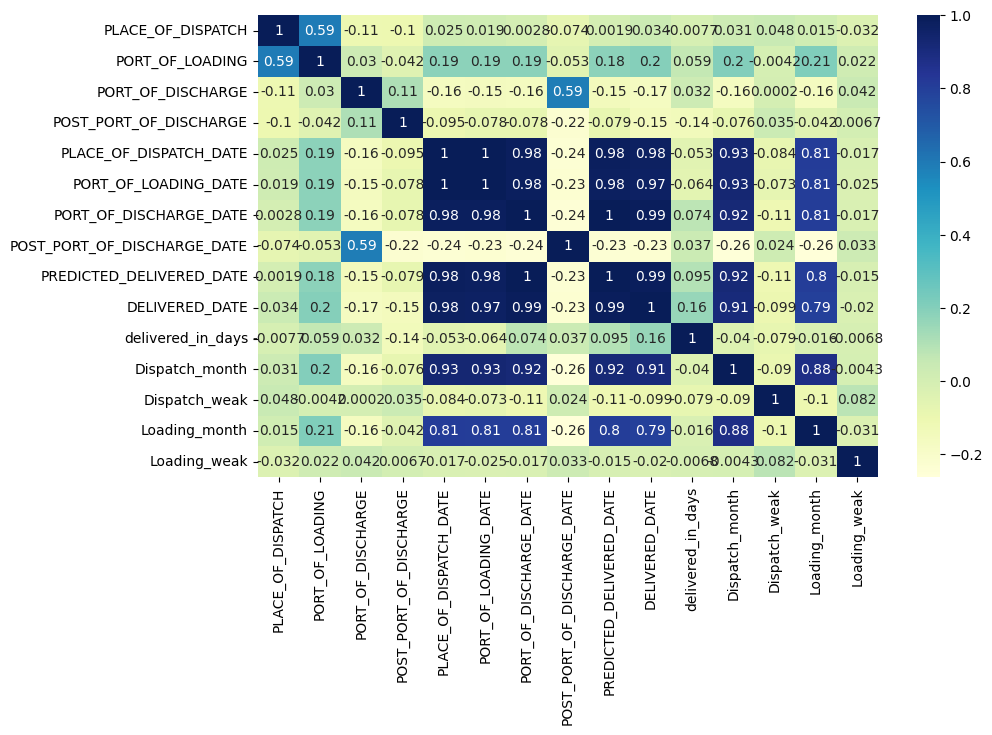

In [46]:
plt.figure(figsize=(10, 6)) 
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)  
# displaying heatmap
plt.show()

**Random Forest Regression**

In [47]:
target = 'delivered_in_days'
features = ['PLACE_OF_DISPATCH', 'PORT_OF_LOADING', 'PORT_OF_DISCHARGE',
       'POST_PORT_OF_DISCHARGE','Dispatch_month','Dispatch_weak', 'Loading_month', 'Loading_weak']
X = df[features]
y = df[target]
X_data = StandardScaler().fit_transform(X)

train_size = int(X.shape[0]*0.8)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

****Fit the Random Forest regression Model****

In [48]:
model= RandomForestRegressor(n_estimators=100, random_state=10)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=10)

In [49]:
y_pred = model.predict(X_test)

In [50]:
print("Random Forest Regressor's Mean Absolute Error: " + str(mean_absolute_error(y_pred, y_test)))
# y.describe()

Random Forest Regressor's Mean Absolute Error: 8.510263774651273


In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators=100, random_state=10)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train,pd.Series.ravel(y_train), cv=cv, n_jobs=4, 
                                                                      train_sizes=np.linspace(.1, 1.0, 5), return_times=True)

C:\Users\gagan\AppData\Local\Temp\ipykernel_11916\3795362872.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X_train,pd.Series.ravel(y_train), cv=cv, n_jobs=4,


Text(0.5, 1.0, 'Performance of the model')

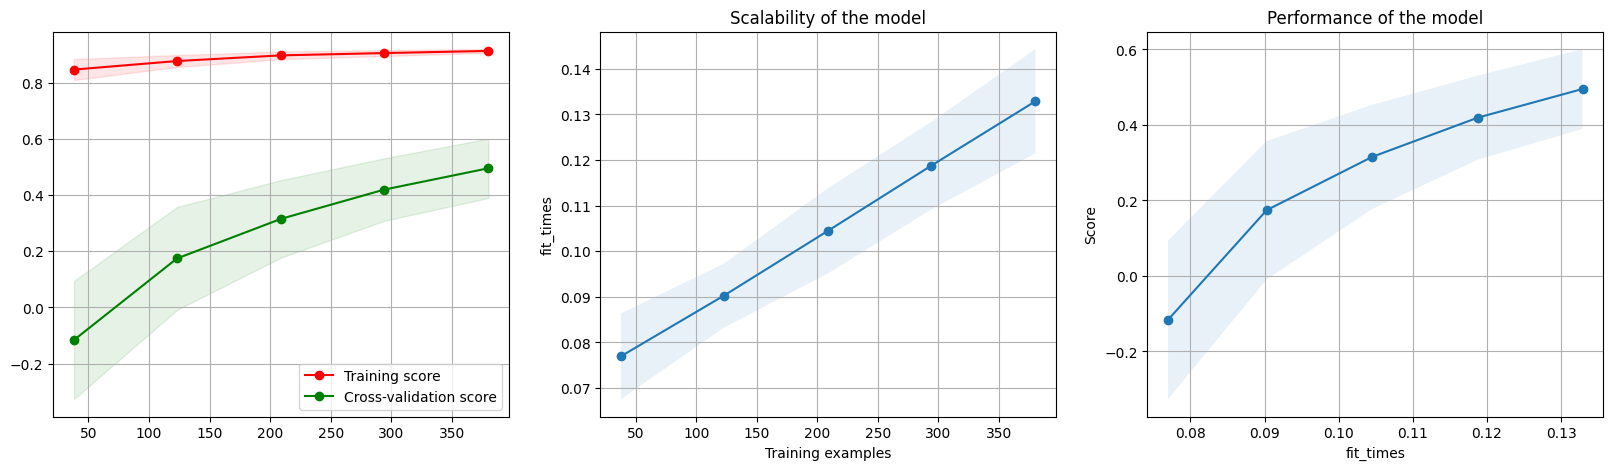

In [52]:
_,axes = plt.subplots(1, 3, figsize=(20, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)

# Plot learning curve
axes[0].grid()
axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
axes[0].legend(loc="best")

# Plot n_samples vs fit_times
axes[1].grid()
axes[1].plot(train_sizes, fit_times_mean, 'o-')
axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                     fit_times_mean + fit_times_std, alpha=0.1)
axes[1].set_xlabel("Training examples")
axes[1].set_ylabel("fit_times")
axes[1].set_title("Scalability of the model")

# Plot fit_time vs score
axes[2].grid()
axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1)
axes[2].set_xlabel("fit_times")
axes[2].set_ylabel("Score")
axes[2].set_title("Performance of the model")

These plots are just for analysing the training-validation score, scalability and performance of model, the performance of model is real good after each fit time, 
In the end merge the predictions days corresponding to every row in our data frame 


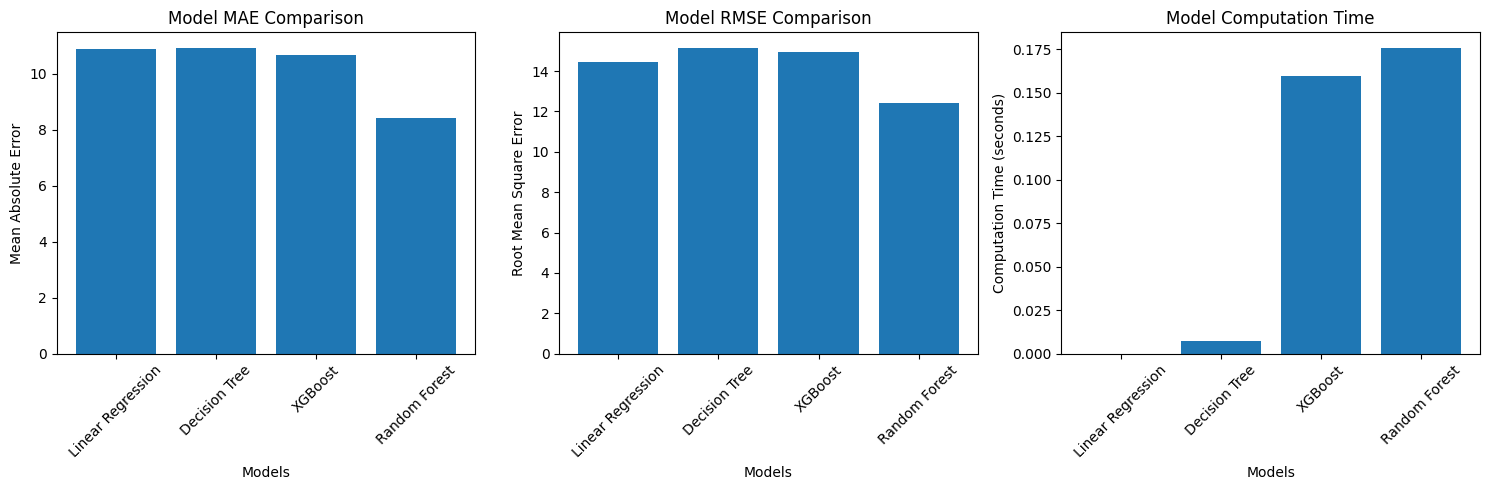


Detailed Model Results:
--------------------------------------------------

Linear Regression:
Mean Absolute Error: 10.8930
Root Mean Square Error: 14.4446
Computation Time: 0.0000 seconds
--------------------------------------------------

Decision Tree:
Mean Absolute Error: 10.9264
Root Mean Square Error: 15.1647
Computation Time: 0.0070 seconds
--------------------------------------------------

XGBoost:
Mean Absolute Error: 10.6483
Root Mean Square Error: 14.9242
Computation Time: 0.1595 seconds
--------------------------------------------------

Random Forest:
Mean Absolute Error: 8.4249
Root Mean Square Error: 12.3977
Computation Time: 0.1759 seconds
--------------------------------------------------

Best Model Based on MAE: Random Forest
MAE: 8.4249


In [53]:
# Import required models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

# Dictionary to store model results
model_results = {}

# 1. Linear Regression
start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
model_results['Linear Regression'] = {
    'mae': mean_absolute_error(y_test, lr_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, lr_pred)),
    'time': time.time() - start_time
}

# 2. Decision Tree
start_time = time.time()
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
model_results['Decision Tree'] = {
    'mae': mean_absolute_error(y_test, dt_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, dt_pred)),
    'time': time.time() - start_time
}

# 3. XGBoost
start_time = time.time()
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
model_results['XGBoost'] = {
    'mae': mean_absolute_error(y_test, xgb_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, xgb_pred)),
    'time': time.time() - start_time
}

# 4. Random Forest
start_time = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
model_results['Random Forest'] = {
    'mae': mean_absolute_error(y_test, rf_pred),
    'rmse': np.sqrt(mean_squared_error(y_test, rf_pred)),
    'time': time.time() - start_time
}

# Create visualization of model comparisons
plt.figure(figsize=(15, 5))

# Plot 1: MAE Comparison
plt.subplot(131)
mae_scores = [results['mae'] for results in model_results.values()]
plt.bar(model_results.keys(), mae_scores)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Model MAE Comparison')
plt.xticks(rotation=45)

# Plot 2: RMSE Comparison
plt.subplot(132)
rmse_scores = [results['rmse'] for results in model_results.values()]
plt.bar(model_results.keys(), rmse_scores)
plt.xlabel('Models')
plt.ylabel('Root Mean Square Error')
plt.title('Model RMSE Comparison')
plt.xticks(rotation=45)

# Plot 3: Computation Time
plt.subplot(133)
times = [results['time'] for results in model_results.values()]
plt.bar(model_results.keys(), times)
plt.xlabel('Models')
plt.ylabel('Computation Time (seconds)')
plt.title('Model Computation Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Model Results:")
print("-" * 50)
for model_name, results in model_results.items():
    print(f"\n{model_name}:")
    print(f"Mean Absolute Error: {results['mae']:.4f}")
    print(f"Root Mean Square Error: {results['rmse']:.4f}")
    print(f"Computation Time: {results['time']:.4f} seconds")
    print("-" * 50)

# Identify best model
best_model = min(model_results.items(), key=lambda x: x[1]['mae'])
print(f"\nBest Model Based on MAE: {best_model[0]}")
print(f"MAE: {best_model[1]['mae']:.4f}")

In [54]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [55]:
y_pred_test = y_pred_test.astype(int)

**In the end merge the predictions days corresponding to every row in our data frame**

In [56]:
y_pred_test[2]

67

In [57]:
X_test['predicted_days'] = np.hstack(y_pred_test)

C:\Users\gagan\AppData\Local\Temp\ipykernel_11916\3364867010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['predicted_days'] = np.hstack(y_pred_test)


In [58]:
X_test

,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,Dispatch_month,Dispatch_weak,Loading_month,Loading_weak,predicted_days
1385,8,24,8,2,12,0,12,4,65
1386,8,24,7,2,11,3,12,5,65
1392,8,24,7,2,11,4,11,0,67
1394,25,26,2,3,11,5,11,0,52
1395,23,24,7,2,11,1,11,6,58
...,...,...,...,...,...,...,...,...,...
1780,16,19,7,2,12,6,1,2,49
1787,8,24,8,2,12,2,12,6,62
1805,25,26,8,2,12,4,12,1,55
1810,8,24,7,2,11,0,11,1,71


In [59]:
# Convert predicted values to integers
y_pred_train_2 = np.round(y_pred_train).astype(int)
y_pred_test_2 = np.round(y_pred_test).astype(int)
df_1=df.copy()
# Add predicted days to dataframe
df_1['predicted_days'] = np.hstack([y_pred_train_2, y_pred_test_2])

# Compare actual vs predicted days
print("\nComparison of Actual vs Predicted Delivery Days:")
# print(df[['actual_days', 'predicted_days']].head())

# Calculate absolute error in days
df_1['prediction_error'] = abs(df_1['delivered_in_days'] - df_1['predicted_days'])

print("\nPrediction Error Statistics (in days):")
# print(df['prediction_error'].describe())


Comparison of Actual vs Predicted Delivery Days:

Prediction Error Statistics (in days):


In [60]:
df_1

,PLACE_OF_DISPATCH,PORT_OF_LOADING,PORT_OF_DISCHARGE,POST_PORT_OF_DISCHARGE,PLACE_OF_DISPATCH_DATE,PORT_OF_LOADING_DATE,PORT_OF_DISCHARGE_DATE,POST_PORT_OF_DISCHARGE_DATE,PREDICTED_DELIVERED_DATE,DELIVERED_DATE,delivered_in_days,Dispatch_month,Dispatch_weak,Loading_month,Loading_weak,predicted_days,prediction_error
0,25,26,7,2,2021-05-18,2021-05-19,2021-07-17,2021-07-15,2021-08-03,2021-07-21,64,5,1,5,2,67,3
1,25,26,7,2,2021-05-18,2021-05-19,2021-07-23,2021-07-21,2021-08-09,2021-07-27,70,5,1,5,2,67,3
2,16,19,7,4,2021-04-11,2021-04-17,2021-05-05,2021-06-07,2021-06-11,2021-06-16,66,4,6,4,5,53,13
3,23,6,7,2,2021-05-19,2021-05-20,2021-07-15,2021-07-12,2021-07-19,2021-07-20,62,5,2,5,3,61,1
4,25,26,7,4,2021-05-18,2021-05-24,2021-06-11,2021-06-22,2021-06-26,2021-06-28,41,5,1,5,0,46,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,16,19,7,2,2021-12-26,2022-01-12,2022-01-27,2022-02-01,2022-02-02,2022-02-07,43,12,6,1,2,49,6
1787,8,24,8,2,2021-12-08,2021-12-12,2022-01-31,2022-02-05,2022-02-08,2022-02-10,64,12,2,12,6,62,2
1805,25,26,8,2,2021-12-24,2021-12-28,2022-02-03,2022-02-11,2022-02-11,2022-02-17,55,12,4,12,1,55,0
1810,8,24,7,2,2021-11-22,2021-11-30,2022-02-02,2022-02-12,2022-02-16,2022-02-17,87,11,0,11,1,71,16


In [61]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.510263774651273
Root Mean Squared Error: 12.739154515384582


In [62]:
# Import necessary libraries
import pickle
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the best model (assuming Random Forest is the best model)
with open('models/random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Save the label encoders and scalers used in preprocessing
preprocessing_objects = {
    'label_encoders': labelencoder,  # If you used any LabelEncoders
}

with open('models/preprocessors.pkl', 'wb') as f:
    pickle.dump(preprocessing_objects, f)

# Save feature names and their types
feature_info = {
    'categorical_features': [
        'FREIGHT_FORWARDER',
        'PORT_OF_LOADING',
        'PORT_OF_DISCHARGE',
        'VESSEL_NAME'
    ],
    'numerical_features': [
        'Unit quantity',
        'Weight'
    ]
}

with open('models/feature_info.pkl', 'wb') as f:
    pickle.dump(feature_info, f)